In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("datasets/flight_prediction.csv")

In [5]:
#dropdown kolom yang gak perlu
df.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [6]:
#lihat bentuk data
print("Dimensi data:", df.shape)
print("5 data pertama:")
display(df.head())

Dimensi data: (300153, 10)
5 data pertama:


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
print("📈 Statistik Deskriptif:")
display(df.describe())

📈 Statistik Deskriptif:


,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


karena price dan durationnya kemungkinan ada outlier, jadi kita cari dulu

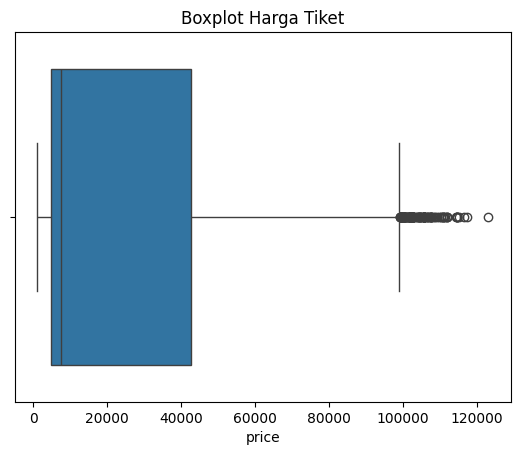

In [8]:
sns.boxplot(x=df['price'])
plt.title("Boxplot Harga Tiket")
plt.show()

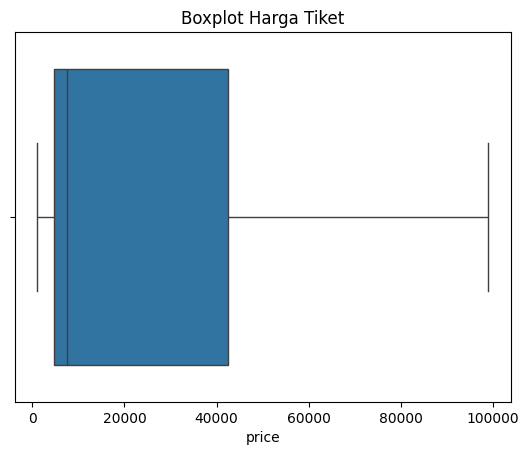

In [9]:
#buang outlier dari kolom price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

sns.boxplot(x=df['price'])
plt.title("Boxplot Harga Tiket")
plt.show()

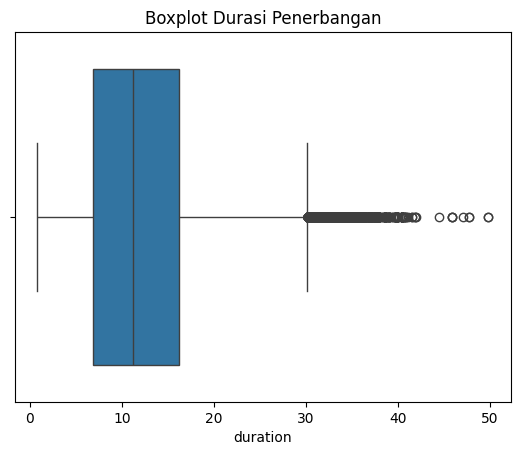

In [10]:
sns.boxplot(x=df['duration'])
plt.title("Boxplot Durasi Penerbangan")
plt.show()

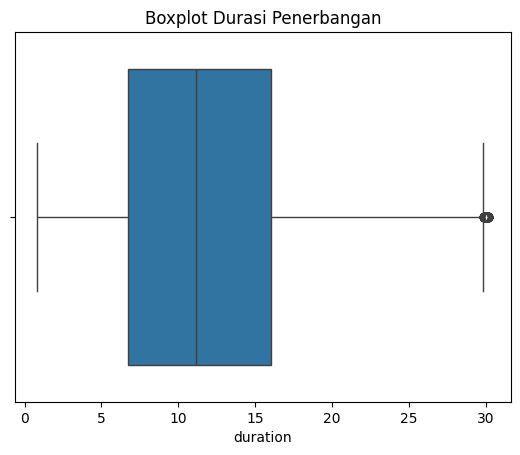

In [11]:
#buang outlier dari kolom duration
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['duration'] >= Q1 - 1.5 * IQR) & (df['duration'] <= Q3 + 1.5 * IQR)]

sns.boxplot(x=df['duration'])
plt.title("Boxplot Durasi Penerbangan")
plt.show()

In [12]:
print("📈 Statistik Deskriptif:")
display(df.describe())

📈 Statistik Deskriptif:


,duration,days_left,price
count,297920.000000,297920.000000,297920.000000
mean,12.071699,26.039370,20882.941276
std,6.994057,13.549647,22672.112441
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4757.000000
50%,11.170000,26.000000,7424.000000
75%,16.000000,38.000000,42521.000000
max,30.170000,49.000000,98972.000000


In [13]:
#cek jumlah tiket yang harganya 1000an buat mastiin dia outlier apa engga
df[df['price'] < 2000]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
37113,AirAsia,Delhi,Morning,one,Afternoon,Chennai,Economy,5.50,15,1998
37114,AirAsia,Delhi,Afternoon,one,Night,Chennai,Economy,5.92,15,1998
37115,AirAsia,Delhi,Early_Morning,one,Afternoon,Chennai,Economy,7.08,15,1998
37116,AirAsia,Delhi,Morning,one,Evening,Chennai,Economy,7.83,15,1998
37117,AirAsia,Delhi,Early_Morning,one,Evening,Chennai,Economy,9.42,15,1998
...,...,...,...,...,...,...,...,...,...,...
206614,Indigo,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.33,49,1551
206615,Indigo,Chennai,Evening,zero,Night,Hyderabad,Economy,1.33,49,1551
206616,AirAsia,Chennai,Night,one,Morning,Hyderabad,Economy,9.25,49,1550
206617,AirAsia,Chennai,Night,one,Morning,Hyderabad,Economy,10.17,49,1550


 Kalau ternyata ada 5039 baris data yang harga tiketnya di bawah 2000, itu kemungkinan besar bukan outlier ya

🧠 Kenapa?
Outlier itu biasanya:
- Data yang jarang banget terjadi
- Berbeda jauh dari mayoritas data

Tapi kalau 5039 baris dari total 300.000-an baris (~1.7% dari total) punya harga serendah itu, bisa jadi itu:
- Promo reguler
- Diskon maskapai tertentu
- Atau rute pendek yang emang murah

Jadi selama datanya masuk akal (misalnya duration pendek, days_left mepet, maskapai low-cost, dll), biarin aja. Gak perlu dihapus.

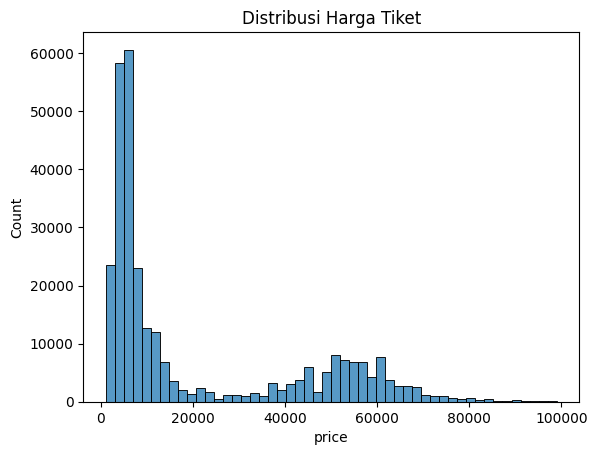

In [14]:
#cek distribusi harga tiket pakai histogram
sns.histplot(df['price'], bins=50)
plt.title("Distribusi Harga Tiket")
plt.show()


⚠️ Tapi...
Distribusinya nggak normal alias right-skewed (miring ke kanan), artinya:
- Sebagian besar harga rendah
- Sedikit data harga tinggi banget (long tail)

Ini penting karena:
- Regresi linear sensitif terhadap distribusi kayak gini.
- Bisa coba transformasi log kalau performa model kurang oke nanti.

In [15]:
import numpy as np

df['price_log'] = np.log1p(df['price'])  # pakai log1p biar aman kalau ada harga 0
